<a href="https://colab.research.google.com/github/DB9653/Bachelorarbeit/blob/main/NSIT_IIITDWD_(TrainGE18_TestH20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/roushan-raj/HASOC-2020/blob/master/Models/German%20Models/German%20Sub-task%20A.ipynb


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'


# Dataset Reading


In [ ]:
import pandas as pd 
#data = pd.read_excel('/content/hasoc_2020_de_train_new_a.xlsx', converters={'tweet_id':int})
data = pd.read_csv("/content/germeval2018training.txt",sep="\t", encoding = "UTF-8", names=("text", "task1", "task2"))
pd.set_option('display.max_colwidth',150)
data.head(10)

,text,task1,task2
0,"@corinnamilborn Liebe Corinna, wir würden dich gerne als Moderatorin für uns gewinnen! Wärst du begeisterbar?",OTHER,OTHER
1,"@Martin28a Sie haben ja auch Recht. Unser Tweet war etwas missverständlich. Dass das BVerfG Sachleistungen nicht ausschließt, kritisieren wir.",OTHER,OTHER
2,@ahrens_theo fröhlicher gruß aus der schönsten stadt der welt theo ⚓️,OTHER,OTHER
3,@dushanwegner Amis hätten alles und jeden gewählt...nur Hillary wollten sie nicht und eine Fortsetzung von Obama-Politik erst recht nicht..!,OTHER,OTHER
4,@spdde kein verläßlicher Verhandlungspartner. Nachkarteln nach den Sondierzngsgesprächen - schickt diese Stümper #SPD in die Versenkung.,OFFENSE,INSULT
5,"@Dirki_M Ja, aber wo widersprechen die Zahlen denn denen, die im von uns verlinkten Artikel stehen? In unserem Tweet geht es rein um subs. Geschüt...",OTHER,OTHER
6,@milenahanm 33 bis 45 habe ich noch gar nicht gelebt und es geht mir am Arsch vorbei was in dieser Zeit geschehen ist. Ich lebe im heute und jetzt...,OFFENSE,PROFANITY
7,@jayxderxmensch @jayxthexhuman Wieso? Was findest du da unklar?,OTHER,OTHER
8,@tagesschau Euere AfD Hetze wirkt. Da könnt ihr stolz sein bei #ARD-Fernsehen,OFFENSE,ABUSE
9,"Deutsche Medien, Halbwahrheiten und einseitige Betrachtung, wie bei allen vom Staat finanzierten ""billigen"" Propagandainstitutionen 😜",OFFENSE,ABUSE


In [ ]:
data.shape

(5009, 3)

In [ ]:
print(data.dtypes)

text     object
task1    object
task2    object
dtype: object


# Making of "label" Variable


In [ ]:
label = data['task1']
label.head()

0      OTHER
1      OTHER
2      OTHER
3      OTHER
4    OFFENSE
Name: task1, dtype: object

# Checking Dataset Balancing


OTHER      3321
OFFENSE    1688
Name: task1, dtype: int64


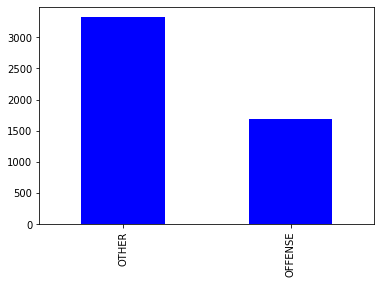

In [ ]:
print(label.value_counts())
import matplotlib.pyplot as plt
label.value_counts().plot(kind='bar', color='blue')

# Converting label into "0" or "1"


In [ ]:
import numpy as np
classes_list = ["OFFENSE","OTHER"]
label_index = data['task1'].apply(classes_list.index)
final_label = np.asarray(label_index)
print(final_label[:10])



[1 1 1 1 0 1 0 1 0 0]


In [ ]:
from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(final_label, num_classes=2)

In [ ]:
print(label_twoDimension[:10])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


# Making of "text" Variable


In [ ]:
text = data['text']
text.head(10)



0                                            @corinnamilborn Liebe Corinna, wir würden dich gerne als Moderatorin für uns gewinnen! Wärst du begeisterbar?
1           @Martin28a Sie haben ja auch Recht. Unser Tweet war etwas missverständlich. Dass das BVerfG Sachleistungen nicht ausschließt, kritisieren wir.
2                                                                                    @ahrens_theo fröhlicher gruß aus der schönsten stadt der welt theo ⚓️
3             @dushanwegner Amis hätten alles und jeden gewählt...nur Hillary wollten sie nicht und eine Fortsetzung von Obama-Politik erst recht nicht..!
4                 @spdde kein verläßlicher Verhandlungspartner. Nachkarteln nach den Sondierzngsgesprächen - schickt diese Stümper #SPD in die Versenkung.
5    @Dirki_M Ja, aber wo widersprechen die Zahlen denn denen, die im von uns verlinkten Artikel stehen? In unserem Tweet geht es rein um subs. Geschüt...
6    @milenahanm 33 bis 45 habe ich noch gar nicht gelebt und es geht 

# Dataset Pre-processing


In [ ]:
def remove_umlaut(string):
    """
    Removes umlauts from strings and replaces them with the letter+e convention
    :param string: string to remove umlauts from
    :return: unumlauted string
    """
    u = 'ü'.encode()
    U = 'Ü'.encode()
    a = 'ä'.encode()
    A = 'Ä'.encode()
    o = 'ö'.encode()
    O = 'Ö'.encode()
    ss = 'ß'.encode()

    string = string.encode()
    string = string.replace(u, b'ue')
    string = string.replace(U, b'Ue')
    string = string.replace(a, b'ae')
    string = string.replace(A, b'Ae')
    string = string.replace(o, b'oe')
    string = string.replace(O, b'Oe')
    string = string.replace(ss, b'ss')

    string = string.decode('utf-8')
    return string

In [ ]:
text_wo_umlauts = text.apply(lambda x:remove_umlaut(x))
text_wo_umlauts.head(10)

0                                         @corinnamilborn Liebe Corinna, wir wuerden dich gerne als Moderatorin fuer uns gewinnen! Waerst du begeisterbar?
1         @Martin28a Sie haben ja auch Recht. Unser Tweet war etwas missverstaendlich. Dass das BVerfG Sachleistungen nicht ausschliesst, kritisieren wir.
2                                                                                 @ahrens_theo froehlicher gruss aus der schoensten stadt der welt theo ⚓️
3           @dushanwegner Amis haetten alles und jeden gewaehlt...nur Hillary wollten sie nicht und eine Fortsetzung von Obama-Politik erst recht nicht..!
4             @spdde kein verlaesslicher Verhandlungspartner. Nachkarteln nach den Sondierzngsgespraechen - schickt diese Stuemper #SPD in die Versenkung.
5    @Dirki_M Ja, aber wo widersprechen die Zahlen denn denen, die im von uns verlinkten Artikel stehen? In unserem Tweet geht es rein um subs. Geschue...
6    @milenahanm 33 bis 45 habe ich noch gar nicht gelebt und es geht 

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text = text_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text.head(10)

0                                          corinnamilborn liebe corinna, wir wuerden dich gerne als moderatorin fuer uns gewinnen! waerst du begeisterbar 
1           ma in28a sie haben ja auch recht. unser tweet war etwas missverstaendlich. dass das bverfg sachleistungen nicht ausschliesst, kritisieren wir.
2                                                                                  ahrens theo froehlicher gruss aus der schoensten stadt der welt theo   
3             dushanwegner amis haetten alles und jeden gewaehlt...nur hillary wollten sie nicht und eine fo setzung von obama-politik erst recht nicht..!
4                spdde kein verlaesslicher verhandlungspa ner. nachka eln nach den sondierzngsgespraechen - schickt diese stuemper  spd in die versenkung.
5     dirki m ja, aber wo widersprechen die zahlen denn denen, die im von uns verlinkten a ikel stehen  in unserem tweet geht es rein um subs. geschuet...
6     milenahanm 33 bis 45 habe ich noch gar nicht gelebt und es geht 

# Removing stopwords


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
clean_text_ns=clean_text.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_ns.head(10))

0                                                              corinnamilborn liebe corinna, wuerden gerne moderatorin fuer gewinnen! waerst begeisterbar 
1                                                         ma in28a ja recht. tweet missverstaendlich. bverfg sachleistungen ausschliesst, kritisieren wir.
2                                                                                              ahrens theo froehlicher gruss schoensten stadt welt theo   
3                                                    dushanwegner amis haetten gewaehlt...nur hillary wollten fo setzung obama-politik erst recht nicht..!
4                                           spdde verlaesslicher verhandlungspa ner. nachka eln sondierzngsgespraechen - schickt stuemper  spd versenkung.
5     dirki m ja, widersprechen zahlen denen, verlinkten a ikel stehen  tweet geht rein subs. geschuetzte. 2017 gesamte familiennachzug vergleich 2016 ...
6                                                              milenah

# Lemmatization

# Stemming

In [ ]:


# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text



In [ ]:
clean_text_stem = clean_text_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_stem.head())

0                        corinnamilborn liebe corinna, wuerden gerne moderatorin fuer gewinnen! waerst begeisterbar 
1                   ma in28a ja recht. tweet missverstaendlich. bverfg sachleistungen ausschliesst, kritisieren wir.
2                                                        ahrens theo froehlicher gruss schoensten stadt welt theo   
3              dushanwegner amis haetten gewaehlt...nur hillary wollten fo setzung obama-politik erst recht nicht..!
4     spdde verlaesslicher verhandlungspa ner. nachka eln sondierzngsgespraechen - schickt stuemper  spd versenkung.
Name: text, dtype: object


# Tokenization using "keras"


In [ ]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(clean_text_stem)

# Making Vocab for words


In [ ]:
vocabulary_all = len(tok_all.word_counts)
print(vocabulary_all)

17327


In [ ]:


l = tok_all.word_index
print(l)



{'lbr': 1, 'fuer': 2, 'merkel': 3, 'schon': 4, 'deutschland': 5, 'afd': 6, 'mehr': 7, 'mal': 8, 'ja': 9, 'ueber': 10, 'u': 11, 'immer': 12, 'heute': 13, 'gibt': 14, 'welt': 15, 'wer': 16, 'd': 17, 'nicht': 18, 'ist': 19, 'deutschen': 20, 'e': 21, 'deutsche': 22, 'land': 23, 'geht': 24, 'spd': 25, 'werden': 26, 'krippmarie': 27, 'en': 28, 'info2099': 29, 'amp': 30, 'petpanther0': 31, 'noherrman': 32, 'franz': 33, 'muessen': 34, 'md': 35, 'ellibisathide': 36, 'wuerde': 37, 'pa': 38, 'athinamala': 39, 'macmike': 40, 'a': 41, 'menschen': 42, 'thomasgbauer': 43, 'feldenfrizz': 44, 'gut': 45, 'macht': 46, 'charlie': 47, 'silve': 48, 'nasanasal': 49, 's': 50, 'koennen': 51, 'machtjanix23': 52, 'einfach': 53, 'lifetrend': 54, 'gruenen': 55, 'eu': 56, 'schmiddiemaik': 57, 'willjrosenblatt': 58, 'waere': 59, 'wurde': 60, 'seit': 61, 'politiker': 62, 'die': 63, 'putin': 64, 'cdu': 65, 'haben': 66, 'geld': 67, 'wohl': 68, 'warum': 69, 'gerade': 70, 'politik': 71, '2': 72, 'und': 73, 'troll': 74, '

# encoding or sequencing


In [ ]:
encoded_clean_text_stem = tok_all.texts_to_sequences(clean_text_stem)
print(clean_text_stem[0])
print(encoded_clean_text_stem[0])

 corinnamilborn liebe corinna, wuerden gerne moderatorin fuer gewinnen! waerst begeisterbar 
[4221, 191, 6796, 258, 233, 6797, 2, 2418, 2419, 6798]


# Pre-padding


In [ ]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_stem = sequence.pad_sequences(encoded_clean_text_stem, maxlen=max_length, padding='pre')

# Reading Test data and Pre-processing


In [ ]:
data_t = pd.read_csv("/content/hasoc20test_improved.csv", converters={'tweet_id':int})

pd.set_option('display.max_colwidth',150)
data_t.head(10)

data_t['task1'] = data_t['task1'].str.replace('NOT', 'OTHER')
data_t

data_t['task1'] = data_t['task1'].str.replace('HOF', 'OFFENSE')
data_t

data_t = data_t.drop(["Unnamed: 0"], axis = 1)

NameError: ignored

In [ ]:
data_t.shape

(526, 5)

In [ ]:
data_t

,tweet_id,text,task1,task2,ID
0,1129095874242650112,@derCarsti Boykottieren hört sich besser an. 💙💙,OTHER,NONE,hasoc_2020_de_1053
1,1129004308396236800,"RT @ibikus31: Es wird spekuliert, ob Merkel ein Amt in Brüssel übernimmt.\nWäre es so, wie schätzen Sie dann die Zukunft der Mitgliedstaaten…",OTHER,NONE,hasoc_2020_de_671
2,1130896929355907080,Hat #Hitler wirklich den Krieg in der Wüste verloren? Nach der #Welt Schlagzeile hat die #Tagesschau nicht reagiert.,OTHER,NONE,hasoc_2020_de_2977
3,1132251534329307136,"RT @Beatrix_vStorch: #May tritt in UK unter Tränen zurück. Wenn #Merkel zurücktritt, dann auch unter Tränen – unter den Freudentränen von M…",OTHER,NONE,hasoc_2020_de_1746
4,1124941869115498496,@justmeDoro Eher nicht. Das Gänse hauen wieder ab in ihre warmen Überwinterungsquartiere. 😅😂,OTHER,NONE,hasoc_2020_de_2416
...,...,...,...,...,...
521,1124809878546128897,RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehirn!!! Auuuuuu!!!!!!! https://t.co/AFVG5hQCfA,OTHER,NONE,hasoc_2020_de_486
522,1132433240000798720,Die Zerstörung der Grünen. https://t.co/SIYDJjACts,OTHER,NONE,hasoc_2020_de_3388
523,1127366294255357958,"RT @PParzival: ""Antideutsche"" Pseudo-linke Ideologie\nDie Sache hat System: Nicht nur innerhalb der Linken hat sich eine Bewegung etabliert,…",OTHER,NONE,hasoc_2020_de_2745
524,1124362090460975105,Klug reden und dumm leben.,OTHER,NONE,hasoc_2020_de_236


In [ ]:
print(data_t.dtypes)

tweet_id     int64
text        object
task1       object
task2       object
ID          object
dtype: object


In [ ]:


label_t = data_t['task1']
label_t.head()



0    OTHER
1    OTHER
2    OTHER
3    OTHER
4    OTHER
Name: task1, dtype: object

OTHER      365
OFFENSE    161
Name: task1, dtype: int64


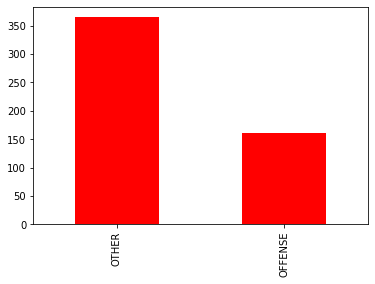

In [ ]:
print(label_t.value_counts())
import matplotlib.pyplot as plt
label_t.value_counts().plot(kind='bar', color='red')

In [ ]:


import numpy as np
classes_list_t = ["OFFENSE","OTHER"]
label_t_index = data_t['task1'].apply(classes_list_t.index)
final_label_t = np.asarray(label_t_index)
print(final_label_t[:10])



[1 1 1 1 1 0 0 1 1 1]


In [ ]:


from keras.utils.np_utils import to_categorical
label_twoDimension_t = to_categorical(final_label_t, num_classes=2)



In [ ]:
print(label_twoDimension_t[:10])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:


text_t = data_t['text']
text_t.head(10)



0                                                                                                  @derCarsti Boykottieren hört sich besser an. 💙💙
1    RT @ibikus31: Es wird spekuliert, ob Merkel ein Amt in Brüssel übernimmt.\nWäre es so, wie schätzen Sie dann die Zukunft der Mitgliedstaaten…
2                             Hat #Hitler wirklich den Krieg in der Wüste verloren? Nach der #Welt Schlagzeile hat die #Tagesschau nicht reagiert.
3     RT @Beatrix_vStorch: #May tritt in UK unter Tränen zurück. Wenn #Merkel zurücktritt, dann auch unter Tränen – unter den Freudentränen von M…
4                                                     @justmeDoro Eher nicht. Das Gänse hauen wieder ab in ihre warmen Überwinterungsquartiere. 😅😂
5     RT @VonSchwer: Ein guter Patriot geht von Bord‼️Gestürzt durch einen, vom ZDF finanzierten, linken Schmierenkomödianten 😡‼️ https://t.co/rl…
6                     @yooli_derechte @MontanaBlack Mich wundert es echt wie du noch keine Cockschelle bekommen hast. 

In [ ]:
test_wo_umlauts = text_t.apply(lambda x: remove_umlaut(x))

In [ ]:
test_wo_umlauts.head()

0                                                                                                     @derCarsti Boykottieren hoert sich besser an. 💙💙
1    RT @ibikus31: Es wird spekuliert, ob Merkel ein Amt in Bruessel uebernimmt.\nWaere es so, wie schaetzen Sie dann die Zukunft der Mitgliedstaaten…
2                                Hat #Hitler wirklich den Krieg in der Wueste verloren? Nach der #Welt Schlagzeile hat die #Tagesschau nicht reagiert.
3    RT @Beatrix_vStorch: #May tritt in UK unter Traenen zurueck. Wenn #Merkel zuruecktritt, dann auch unter Traenen – unter den Freudentraenen von M…
4                                                       @justmeDoro Eher nicht. Das Gaense hauen wieder ab in ihre warmen Ueberwinterungsquartiere. 😅😂
Name: text, dtype: object

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text_t = test_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text_t.head(10)

0                                                                                                      dercarsti boykottieren hoe  sich besser an.   
1         ibikus31: es wird spekulie , ob merkel ein amt in bruessel uebernimmt. waere es so, wie schaetzen sie dann die zukunft der mitgliedstaaten 
2                                hat  hitler wirklich den krieg in der wueste verloren  nach der  welt schlagzeile hat die  tagesschau nicht reagie .
3       beatrix vstorch:  may tritt in uk unter traenen zurueck. wenn  merkel zuruecktritt, dann auch unter traenen   unter den freudentraenen von m 
4                                                        justmedoro eher nicht. das gaense hauen wieder ab in ihre warmen ueberwinterungsqua iere.   
5                          vonschwer: ein guter patriot geht von bord  gestuerzt durch einen, vom zdf finanzie en, linken schmierenkomoedianten      
6                          yooli derechte  montanablack mich wunde  es echt wie du noch keine cocksc

In [ ]:


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_text_t_ns=clean_text_t.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_t_ns.head(10))

0                                                                                dercarsti boykottieren hoe  besser an.   
1                        ibikus31: spekulie , merkel amt bruessel uebernimmt. waere so, schaetzen zukunft mitgliedstaaten 
2                                            hitler wirklich krieg wueste verloren   welt schlagzeile  tagesschau reagie .
3                        beatrix vstorch:  may tritt uk traenen zurueck.  merkel zuruecktritt, traenen   freudentraenen m 
4                                                justmedoro eher nicht. gaense hauen ab warmen ueberwinterungsqua iere.   
5                 vonschwer: guter patriot geht bord  gestuerzt einen, zdf finanzie en, linken schmierenkomoedianten      
6                            yooli derechte  montanablack wunde  echt cockschelle bekommen hast. kinderfickender hurensohn
7                                                                                spd  kuehne  ende  nahles einfach dumm:  
8               

# Stemming

In [ ]:
# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text

In [ ]:
clean_text_t_stem = clean_text_t_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_t_stem.head(10))

0                                                                                dercarsti boykottieren hoe  besser an.   
1                        ibikus31: spekulie , merkel amt bruessel uebernimmt. waere so, schaetzen zukunft mitgliedstaaten 
2                                            hitler wirklich krieg wueste verloren   welt schlagzeile  tagesschau reagie .
3                        beatrix vstorch:  may tritt uk traenen zurueck.  merkel zuruecktritt, traenen   freudentraenen m 
4                                                justmedoro eher nicht. gaense hauen ab warmen ueberwinterungsqua iere.   
5                 vonschwer: guter patriot geht bord  gestuerzt einen, zdf finanzie en, linken schmierenkomoedianten      
6                            yooli derechte  montanablack wunde  echt cockschelle bekommen hast. kinderfickender hurensohn
7                                                                                spd  kuehne  ende  nahles einfach dumm:  
8               

In [ ]:


import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_test = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_test.fit_on_texts(clean_text_t_stem)



In [ ]:


vocabulary_all_test = len(tok_test.word_counts)
print(vocabulary_all_test)



2687


In [ ]:
test_list = tok_test.word_index
print(test_list)

{'einfach': 1, 'deutsche': 2, 'arsch': 3, 'merkel': 4, 'fuer': 5, 'schon': 6, 'gruenen': 7, 'scheiss': 8, 'gt': 9, 'ab': 10, 'mal': 11, 'halt': 12, 'linken': 13, 'dumm': 14, 'porno': 15, 'welt': 16, 'hurensohn': 17, 'immer': 18, 'nazis': 19, 'frau': 20, 'mehr': 21, 'scheisse': 22, 'frauen': 23, 'ja': 24, 'zurueck': 25, 'gratis': 26, 'echt': 27, 'gruene': 28, 'warum': 29, 'tagesschau': 30, 'islam': 31, 'gibt': 32, 'en': 33, 'kinder': 34, 'ficken': 35, 'pack': 36, 'heute': 37, 'idioten': 38, 'ueber': 39, 'hoe': 40, 'besser': 41, 'lange': 42, 'eu': 43, 'dumme': 44, 'e': 45, 'schulz': 46, '3': 47, 'linke': 48, 'wuerde': 49, 'erst': 50, 'leben': 51, 'bild': 52, 'europa': 53, 'ist': 54, 'kopf': 55, 's': 56, 'kurz': 57, '5': 58, '12': 59, 'hasse': 60, 'deutschland': 61, 'eigentlich': 62, 'fresse': 63, 'b': 64, 'gabriel': 65, 'neue': 66, 'an': 67, 'waere': 68, 'eher': 69, 'nicht': 70, 'ganzen': 71, 'lassen': 72, 'a': 73, 'grund': 74, 'kotzen': 75, 'de': 76, 'dummen': 77, 'ma': 78, 'afd': 79, '

In [ ]:


encoded_clean_text_t_stem = tok_all.texts_to_sequences(clean_text_t_stem)
print(clean_text_t_stem[0])
print(encoded_clean_text_t_stem[0])



 dercarsti boykottieren hoe  besser an.   
[3672, 425, 88, 146]


In [ ]:


from keras.preprocessing import sequence
max_length = 100
padded_clean_text_t_stem = sequence.pad_sequences(encoded_clean_text_t_stem, maxlen=max_length, padding='pre')



# FastText Embeddings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gunzip /content/drive/MyDrive/cc.de.300.vec.gz

gzip: /content/drive/MyDrive/cc.de.300.vec.gz: No such file or directory


In [ ]:
# https://stackoverflow.com/questions/69964788/how-to-unzip-gz-file-using-google-colab

# FastText Embedding link - https://fasttext.cc/docs/en/crawl-vectors.html

import os
embeddings_index = {}
f = open('/content/drive/MyDrive/cc.de.300.vec',encoding='utf-8',errors='ignore')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))



Loaded 2000000 word vectors.


In [ ]:


embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
         embedding_matrix[i] = embedding_vector



# CNN 1 Model


In [ ]:


from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq



In [ ]:
Embedding_Layer = Embedding(vocabulary_all+1, 300, weights=[embedding_matrix], input_length=max_length)

In [ ]:
CNN1_network=Sequential([Embedding_Layer,
                        Conv1D(128,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(64,activation="relu"),
                       Dropout(0.3),
                       Dense(2,activation="sigmoid")
                       ])



In [ ]:
CNN1_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          5198400   
                                                                 
 conv1d (Conv1D)             (None, 100, 128)          115328    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                        

In [ ]:
# https://stackoverflow.com/questions/62707558/importerror-cannot-import-name-adam-from-keras-optimizers
from tensorflow.keras.optimizers import Adam
CNN1_network.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(CNN1_network, to_file='CNN2_model_Train_GERMEVAL2018_Test_GERMEVAL2019_TASK_A.png', show_shapes=True, show_layer_names=True)

from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



In [ ]:


from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



# Model Fitting or Training


In [ ]:
hist = CNN1_network.fit(padded_clean_text_stem,label_twoDimension,epochs=200,batch_size=32,callbacks=[earlystopper, reduce_lr])

Epoch 1/200
156/157 [============================>.] - ETA: 0s - loss: 0.6621 - accuracy: 0.6408

157/157 [==============================] - 14s 8ms/step - loss: 0.6622 - accuracy: 0.6406 - lr: 3.0000e-05
Epoch 2/200
155/157 [============================>.] - ETA: 0s - loss: 0.6402 - accuracy: 0.6631

157/157 [==============================] - 1s 7ms/step - loss: 0.6401 - accuracy: 0.6630 - lr: 3.0000e-05
Epoch 3/200
157/157 [==============================] - ETA: 0s - loss: 0.6369 - accuracy: 0.6630

157/157 [==============================] - 1s 7ms/step - loss: 0.6369 - accuracy: 0.6630 - lr: 3.0000e-05
Epoch 4/200
156/157 [============================>.] - ETA: 0s - loss: 0.6318 - accuracy: 0.6627

157/157 [==============================] - 1s 7ms/step - loss: 0.6316 - accuracy: 0.6630 - lr: 3.0000e-05
Epoch 5/200
155/157 [============================>.] - ETA: 0s - loss: 0.6271 - accuracy: 0.6613

157/157 [==============================] - 1s 7ms/step - loss: 0.6263 - accuracy: 0.6630 - lr: 3.0000e-05
Epoch 6/200
156/157 [============================>.] - ETA: 0s - loss: 0.6177 - accuracy: 0.6625

157/157 [==============================] - 1s 7ms/step - loss: 0.6173 - accuracy: 0.6630 - lr: 3.0000e-05
Epoch 7/200
154/157 [============================>.] - ETA: 0s - loss: 0.6040 - accuracy: 0.6629

157/157 [==============================] - 1s 7ms/step - loss: 0.6037 - accuracy: 0.6634 - lr: 3.0000e-05
Epoch 8/200
157/157 [==============================] - ETA: 0s - loss: 0.5844 - accuracy: 0.6742

157/157 [==============================] - 1s 7ms/step - loss: 0.5844 - accuracy: 0.6742 - lr: 3.0000e-05
Epoch 9/200
157/157 [==============================] - ETA: 0s - loss: 0.5552 - accuracy: 0.6973

157/157 [==============================] - 1s 7ms/step - loss: 0.5552 - accuracy: 0.6973 - lr: 3.0000e-05
Epoch 10/200
154/157 [============================>.] - ETA: 0s - loss: 0.5095 - accuracy: 0.7543

157/157 [==============================] - 1s 7ms/step - loss: 0.5095 - accuracy: 0.7542 - lr: 3.0000e-05
Epoch 11/200
155/157 [============================>.] - ETA: 0s - loss: 0.4519 - accuracy: 0.8079

157/157 [==============================] - 1s 7ms/step - loss: 0.4526 - accuracy: 0.8073 - lr: 3.0000e-05
Epoch 12/200
155/157 [============================>.] - ETA: 0s - loss: 0.3908 - accuracy: 0.8504

157/157 [==============================] - 1s 7ms/step - loss: 0.3905 - accuracy: 0.8509 - lr: 3.0000e-05
Epoch 13/200
154/157 [============================>.] - ETA: 0s - loss: 0.3249 - accuracy: 0.8918

157/157 [==============================] - 1s 7ms/step - loss: 0.3260 - accuracy: 0.8912 - lr: 3.0000e-05
Epoch 14/200
157/157 [==============================] - ETA: 0s - loss: 0.2709 - accuracy: 0.9171

157/157 [==============================] - 1s 8ms/step - loss: 0.2709 - accuracy: 0.9171 - lr: 3.0000e-05
Epoch 15/200
156/157 [============================>.] - ETA: 0s - loss: 0.2250 - accuracy: 0.9347

157/157 [==============================] - 1s 7ms/step - loss: 0.2245 - accuracy: 0.9349 - lr: 3.0000e-05
Epoch 16/200
156/157 [============================>.] - ETA: 0s - loss: 0.1860 - accuracy: 0.9495

157/157 [==============================] - 1s 7ms/step - loss: 0.1859 - accuracy: 0.9497 - lr: 3.0000e-05
Epoch 17/200
154/157 [============================>.] - ETA: 0s - loss: 0.1547 - accuracy: 0.9604

157/157 [==============================] - 1s 7ms/step - loss: 0.1548 - accuracy: 0.9603 - lr: 3.0000e-05
Epoch 18/200
150/157 [===========================>..] - ETA: 0s - loss: 0.1260 - accuracy: 0.9706

157/157 [==============================] - 1s 7ms/step - loss: 0.1273 - accuracy: 0.9695 - lr: 3.0000e-05
Epoch 19/200
155/157 [============================>.] - ETA: 0s - loss: 0.1056 - accuracy: 0.9774

157/157 [==============================] - 1s 7ms/step - loss: 0.1052 - accuracy: 0.9776 - lr: 3.0000e-05
Epoch 20/200
157/157 [==============================] - ETA: 0s - loss: 0.0873 - accuracy: 0.9822

157/157 [==============================] - 1s 7ms/step - loss: 0.0873 - accuracy: 0.9822 - lr: 3.0000e-05
Epoch 21/200
156/157 [============================>.] - ETA: 0s - loss: 0.0725 - accuracy: 0.9856

157/157 [==============================] - 1s 7ms/step - loss: 0.0724 - accuracy: 0.9856 - lr: 3.0000e-05
Epoch 22/200
157/157 [==============================] - ETA: 0s - loss: 0.0608 - accuracy: 0.9904

157/157 [==============================] - 1s 7ms/step - loss: 0.0608 - accuracy: 0.9904 - lr: 3.0000e-05
Epoch 23/200
152/157 [============================>.] - ETA: 0s - loss: 0.0508 - accuracy: 0.9920

157/157 [==============================] - 1s 7ms/step - loss: 0.0509 - accuracy: 0.9920 - lr: 3.0000e-05
Epoch 24/200
152/157 [============================>.] - ETA: 0s - loss: 0.0426 - accuracy: 0.9944

157/157 [==============================] - 1s 7ms/step - loss: 0.0423 - accuracy: 0.9946 - lr: 3.0000e-05
Epoch 25/200
156/157 [============================>.] - ETA: 0s - loss: 0.0352 - accuracy: 0.9962

157/157 [==============================] - 1s 7ms/step - loss: 0.0352 - accuracy: 0.9962 - lr: 3.0000e-05
Epoch 26/200
155/157 [============================>.] - ETA: 0s - loss: 0.0298 - accuracy: 0.9972

157/157 [==============================] - 1s 7ms/step - loss: 0.0297 - accuracy: 0.9972 - lr: 3.0000e-05
Epoch 27/200
157/157 [==============================] - ETA: 0s - loss: 0.0248 - accuracy: 0.9984

157/157 [==============================] - 1s 7ms/step - loss: 0.0248 - accuracy: 0.9984 - lr: 3.0000e-05
Epoch 28/200
155/157 [============================>.] - ETA: 0s - loss: 0.0222 - accuracy: 0.9986

157/157 [==============================] - 1s 7ms/step - loss: 0.0222 - accuracy: 0.9986 - lr: 3.0000e-05
Epoch 29/200
157/157 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9992

157/157 [==============================] - 1s 7ms/step - loss: 0.0180 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 30/200
154/157 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9996

157/157 [==============================] - 1s 7ms/step - loss: 0.0158 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 31/200
154/157 [============================>.] - ETA: 0s - loss: 0.0139 - accuracy: 0.9992

157/157 [==============================] - 1s 7ms/step - loss: 0.0139 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 32/200
154/157 [============================>.] - ETA: 0s - loss: 0.0112 - accuracy: 0.9994

157/157 [==============================] - 1s 7ms/step - loss: 0.0112 - accuracy: 0.9994 - lr: 3.0000e-05
Epoch 33/200
155/157 [============================>.] - ETA: 0s - loss: 0.0095 - accuracy: 0.9998

157/157 [==============================] - 1s 7ms/step - loss: 0.0095 - accuracy: 0.9998 - lr: 3.0000e-05
Epoch 34/200
154/157 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0086 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 35/200
157/157 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.9998

157/157 [==============================] - 1s 7ms/step - loss: 0.0079 - accuracy: 0.9998 - lr: 3.0000e-05
Epoch 36/200
157/157 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0063 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 37/200
155/157 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 0.9998

157/157 [==============================] - 1s 7ms/step - loss: 0.0058 - accuracy: 0.9998 - lr: 3.0000e-05
Epoch 38/200
155/157 [============================>.] - ETA: 0s - loss: 0.0052 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0052 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 39/200
154/157 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0043 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 40/200
157/157 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0040 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 41/200
154/157 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0034 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 42/200
155/157 [============================>.] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 43/200
153/157 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0027 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 44/200
156/157 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0022 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 45/200
155/157 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0021 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 46/200
150/157 [===========================>..] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0021 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 47/200
155/157 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 48/200
152/157 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0015 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 49/200
156/157 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0014 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 50/200
154/157 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0012 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 51/200
152/157 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 52/200
156/157 [============================>.] - ETA: 0s - loss: 9.0621e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 9.0812e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 53/200
151/157 [===========================>..] - ETA: 0s - loss: 8.6179e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.5587e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 54/200
155/157 [============================>.] - ETA: 0s - loss: 7.8964e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 7.8689e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 55/200
155/157 [============================>.] - ETA: 0s - loss: 6.7738e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 6.7596e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 56/200
157/157 [==============================] - ETA: 0s - loss: 7.1817e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 7.1817e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 57/200
150/157 [===========================>..] - ETA: 0s - loss: 6.2518e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 6.3170e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 58/200
154/157 [============================>.] - ETA: 0s - loss: 4.9803e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.9552e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 59/200
151/157 [===========================>..] - ETA: 0s - loss: 4.4650e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.5720e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 60/200
155/157 [============================>.] - ETA: 0s - loss: 4.3198e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.3036e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 61/200
155/157 [============================>.] - ETA: 0s - loss: 4.2838e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.2797e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 62/200
155/157 [============================>.] - ETA: 0s - loss: 3.5589e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.5607e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 63/200
156/157 [============================>.] - ETA: 0s - loss: 3.1468e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.1442e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 64/200
150/157 [===========================>..] - ETA: 0s - loss: 3.0299e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.0485e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 65/200
155/157 [============================>.] - ETA: 0s - loss: 2.8349e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.8423e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 66/200
157/157 [==============================] - ETA: 0s - loss: 2.4914e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.4914e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 67/200
156/157 [============================>.] - ETA: 0s - loss: 2.6224e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.6219e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 68/200
155/157 [============================>.] - ETA: 0s - loss: 2.0137e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.0004e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 69/200
152/157 [============================>.] - ETA: 0s - loss: 2.0639e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.1044e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 70/200
154/157 [============================>.] - ETA: 0s - loss: 1.6347e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.6244e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 71/200
155/157 [============================>.] - ETA: 0s - loss: 1.4292e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.4189e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 72/200
156/157 [============================>.] - ETA: 0s - loss: 1.3786e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.3751e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 73/200
155/157 [============================>.] - ETA: 0s - loss: 1.4159e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.4094e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 74/200
156/157 [============================>.] - ETA: 0s - loss: 1.1630e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.1609e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 75/200
157/157 [==============================] - ETA: 0s - loss: 1.1029e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.1029e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 76/200
156/157 [============================>.] - ETA: 0s - loss: 1.0399e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.0368e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 77/200
154/157 [============================>.] - ETA: 0s - loss: 9.3411e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 9.2370e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 78/200
157/157 [==============================] - ETA: 0s - loss: 7.7930e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 7.7930e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 79/200
152/157 [============================>.] - ETA: 0s - loss: 8.0500e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.0544e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 80/200
157/157 [==============================] - ETA: 0s - loss: 8.2740e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.2740e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 81/200
157/157 [==============================] - ETA: 0s - loss: 5.7340e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.7340e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 82/200
152/157 [============================>.] - ETA: 0s - loss: 6.2154e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 6.2167e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 83/200
151/157 [===========================>..] - ETA: 0s - loss: 5.4667e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.4346e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 84/200
155/157 [============================>.] - ETA: 0s - loss: 6.4226e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 6.4105e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 85/200
156/157 [============================>.] - ETA: 0s - loss: 5.2969e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.2903e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 86/200
152/157 [============================>.] - ETA: 0s - loss: 3.8850e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.8312e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 87/200
151/157 [===========================>..] - ETA: 0s - loss: 4.2121e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.1967e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 88/200
155/157 [============================>.] - ETA: 0s - loss: 3.1953e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.1789e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 89/200
156/157 [============================>.] - ETA: 0s - loss: 4.2082e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.1959e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 90/200
154/157 [============================>.] - ETA: 0s - loss: 2.9146e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.9063e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 91/200
154/157 [============================>.] - ETA: 0s - loss: 2.5983e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.6075e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 92/200
151/157 [===========================>..] - ETA: 0s - loss: 2.4521e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.4418e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 93/200
152/157 [============================>.] - ETA: 0s - loss: 3.1398e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.1474e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 94/200
152/157 [============================>.] - ETA: 0s - loss: 2.3410e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.4059e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 95/200
152/157 [============================>.] - ETA: 0s - loss: 2.1936e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.1524e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 96/200
155/157 [============================>.] - ETA: 0s - loss: 2.5418e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.5278e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 97/200
155/157 [============================>.] - ETA: 0s - loss: 1.6006e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.5939e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 98/200
155/157 [============================>.] - ETA: 0s - loss: 1.1972e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.1924e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 99/200
156/157 [============================>.] - ETA: 0s - loss: 1.4543e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.4506e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 100/200
157/157 [==============================] - ETA: 0s - loss: 1.3565e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.3565e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 101/200
157/157 [==============================] - ETA: 0s - loss: 1.3046e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.3046e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 102/200
156/157 [============================>.] - ETA: 0s - loss: 1.4141e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.4095e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 103/200
152/157 [============================>.] - ETA: 0s - loss: 8.7014e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.8654e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 104/200
157/157 [==============================] - ETA: 0s - loss: 8.8272e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.8272e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 105/200
156/157 [============================>.] - ETA: 0s - loss: 1.6611e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.6567e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 106/200
157/157 [==============================] - ETA: 0s - loss: 8.3186e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.3186e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 107/200
153/157 [============================>.] - ETA: 0s - loss: 7.4363e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 7.3620e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 108/200
157/157 [==============================] - ETA: 0s - loss: 6.1535e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 6.1535e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 109/200
150/157 [===========================>..] - ETA: 0s - loss: 4.7283e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.3735e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 110/200
154/157 [============================>.] - ETA: 0s - loss: 7.2741e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 7.2039e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 111/200
157/157 [==============================] - ETA: 0s - loss: 7.8304e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 7.8304e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 112/200
154/157 [============================>.] - ETA: 0s - loss: 5.5585e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.5539e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 113/200
151/157 [===========================>..] - ETA: 0s - loss: 4.4945e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.5320e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 114/200
151/157 [===========================>..] - ETA: 0s - loss: 4.5167e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.4519e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 115/200
156/157 [============================>.] - ETA: 0s - loss: 4.2923e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.2923e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 116/200
154/157 [============================>.] - ETA: 0s - loss: 3.0184e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.0181e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 117/200
151/157 [===========================>..] - ETA: 0s - loss: 4.1848e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.1781e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 118/200
151/157 [===========================>..] - ETA: 0s - loss: 6.8498e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 6.7152e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 119/200
156/157 [============================>.] - ETA: 0s - loss: 4.0240e-06 - accuracy: 1.0000

157/157 [==============================] - 2s 10ms/step - loss: 4.0144e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 120/200
154/157 [============================>.] - ETA: 0s - loss: 3.5125e-06 - accuracy: 1.0000

157/157 [==============================] - 2s 10ms/step - loss: 3.5033e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 121/200
151/157 [===========================>..] - ETA: 0s - loss: 2.7740e-06 - accuracy: 1.0000

157/157 [==============================] - 2s 10ms/step - loss: 2.7502e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 122/200
153/157 [============================>.] - ETA: 0s - loss: 2.2111e-06 - accuracy: 1.0000

157/157 [==============================] - 2s 10ms/step - loss: 2.1748e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 123/200
150/157 [===========================>..] - ETA: 0s - loss: 1.7527e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.8433e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 124/200
155/157 [============================>.] - ETA: 0s - loss: 3.9562e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.9332e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 125/200
153/157 [============================>.] - ETA: 0s - loss: 1.8900e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.0091e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 126/200
153/157 [============================>.] - ETA: 0s - loss: 1.6338e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.6131e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 127/200
155/157 [============================>.] - ETA: 0s - loss: 1.0628e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.0540e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 128/200
154/157 [============================>.] - ETA: 0s - loss: 4.9291e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.8765e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 129/200
152/157 [============================>.] - ETA: 0s - loss: 2.7974e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.9001e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 130/200
157/157 [==============================] - ETA: 0s - loss: 2.2731e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.2731e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 131/200
154/157 [============================>.] - ETA: 0s - loss: 1.9660e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.9854e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 132/200
156/157 [============================>.] - ETA: 0s - loss: 1.7030e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.6983e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 133/200
157/157 [==============================] - ETA: 0s - loss: 1.1554e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.1554e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 134/200
150/157 [===========================>..] - ETA: 0s - loss: 1.3744e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.3405e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 135/200
154/157 [============================>.] - ETA: 0s - loss: 1.4657e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.4584e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 136/200
155/157 [============================>.] - ETA: 0s - loss: 1.1510e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.1446e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 137/200
151/157 [===========================>..] - ETA: 0s - loss: 1.2017e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.1722e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 138/200
151/157 [===========================>..] - ETA: 0s - loss: 1.6795e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.7755e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 139/200
155/157 [============================>.] - ETA: 0s - loss: 1.0049e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.0021e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 140/200
152/157 [============================>.] - ETA: 0s - loss: 1.0218e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.0088e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 141/200
154/157 [============================>.] - ETA: 0s - loss: 9.3026e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 9.2290e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 142/200
157/157 [==============================] - ETA: 0s - loss: 6.5036e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 6.5036e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 143/200
153/157 [============================>.] - ETA: 0s - loss: 8.1759e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.2925e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 144/200
157/157 [==============================] - ETA: 0s - loss: 8.8685e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.8685e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 145/200
153/157 [============================>.] - ETA: 0s - loss: 7.4761e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 7.3789e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 146/200
153/157 [============================>.] - ETA: 0s - loss: 6.3534e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 6.3395e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 147/200
150/157 [===========================>..] - ETA: 0s - loss: 1.1179e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.0975e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 148/200
157/157 [==============================] - ETA: 0s - loss: 5.3621e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.3621e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 149/200
153/157 [============================>.] - ETA: 0s - loss: 5.4731e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.4840e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 150/200
157/157 [==============================] - ETA: 0s - loss: 4.5374e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.5374e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 151/200
153/157 [============================>.] - ETA: 0s - loss: 5.2278e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.2034e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 152/200
150/157 [===========================>..] - ETA: 0s - loss: 5.5294e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.5044e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 153/200
150/157 [===========================>..] - ETA: 0s - loss: 3.5158e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.5224e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 154/200
157/157 [==============================] - ETA: 0s - loss: 4.5088e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.5088e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 155/200
156/157 [============================>.] - ETA: 0s - loss: 8.1794e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.1518e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 156/200
151/157 [===========================>..] - ETA: 0s - loss: 5.3396e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.2260e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 157/200
151/157 [===========================>..] - ETA: 0s - loss: 5.0345e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.0566e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 158/200
150/157 [===========================>..] - ETA: 0s - loss: 3.4123e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.3761e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 159/200
153/157 [============================>.] - ETA: 0s - loss: 5.8386e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.7221e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 160/200
153/157 [============================>.] - ETA: 0s - loss: 1.0424e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.0214e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 161/200
151/157 [===========================>..] - ETA: 0s - loss: 7.2351e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.1866e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 162/200
152/157 [============================>.] - ETA: 0s - loss: 4.8333e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.8428e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 163/200
154/157 [============================>.] - ETA: 0s - loss: 3.1872e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.1763e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 164/200
151/157 [===========================>..] - ETA: 0s - loss: 2.4955e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.4849e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 165/200
156/157 [============================>.] - ETA: 0s - loss: 2.6413e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.6822e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 166/200
154/157 [============================>.] - ETA: 0s - loss: 2.3413e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.3080e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 167/200
156/157 [============================>.] - ETA: 0s - loss: 2.0411e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.0346e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 168/200
157/157 [==============================] - ETA: 0s - loss: 2.1938e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.1938e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 169/200
153/157 [============================>.] - ETA: 0s - loss: 2.9246e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.0218e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 170/200
157/157 [==============================] - ETA: 0s - loss: 2.2867e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.2867e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 171/200
152/157 [============================>.] - ETA: 0s - loss: 2.3470e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.3181e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 172/200
150/157 [===========================>..] - ETA: 0s - loss: 3.1786e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.1417e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 173/200
152/157 [============================>.] - ETA: 0s - loss: 2.4725e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.4165e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 174/200
152/157 [============================>.] - ETA: 0s - loss: 1.3015e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.3520e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 175/200
150/157 [===========================>..] - ETA: 0s - loss: 2.0720e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.0261e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 176/200
157/157 [==============================] - ETA: 0s - loss: 1.8470e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.8470e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 177/200
154/157 [============================>.] - ETA: 0s - loss: 3.3299e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.2969e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 178/200
150/157 [===========================>..] - ETA: 0s - loss: 1.6558e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.3824e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 179/200
150/157 [===========================>..] - ETA: 0s - loss: 1.0775e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.0536e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 180/200
156/157 [============================>.] - ETA: 0s - loss: 1.6646e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.6604e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 181/200
157/157 [==============================] - ETA: 0s - loss: 7.3155e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 7.3155e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 182/200
154/157 [============================>.] - ETA: 0s - loss: 1.3029e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.2837e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 183/200
151/157 [===========================>..] - ETA: 0s - loss: 1.2450e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.2302e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 184/200
153/157 [============================>.] - ETA: 0s - loss: 1.2264e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.2036e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 185/200
152/157 [============================>.] - ETA: 0s - loss: 8.3394e-08 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.2971e-08 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 186/200
155/157 [============================>.] - ETA: 0s - loss: 1.3431e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.3370e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 187/200
150/157 [===========================>..] - ETA: 0s - loss: 9.1057e-08 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 9.1131e-08 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 188/200
152/157 [============================>.] - ETA: 0s - loss: 1.5650e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.5494e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 189/200
157/157 [==============================] - ETA: 0s - loss: 5.4412e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.4412e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 190/200
153/157 [============================>.] - ETA: 0s - loss: 1.9770e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.9422e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 191/200
151/157 [===========================>..] - ETA: 0s - loss: 1.0941e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.0627e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 192/200
156/157 [============================>.] - ETA: 0s - loss: 3.0325e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.0348e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 193/200
155/157 [============================>.] - ETA: 0s - loss: 9.5075e-08 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 9.4462e-08 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 194/200
153/157 [============================>.] - ETA: 0s - loss: 1.7607e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.7224e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 195/200
153/157 [============================>.] - ETA: 0s - loss: 1.2903e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.2767e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 196/200
154/157 [============================>.] - ETA: 0s - loss: 1.3122e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.3120e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 197/200
154/157 [============================>.] - ETA: 0s - loss: 1.2075e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.2161e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 198/200
152/157 [============================>.] - ETA: 0s - loss: 1.4278e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.4783e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 199/200
154/157 [============================>.] - ETA: 0s - loss: 1.8939e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.8659e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 200/200
151/157 [===========================>..] - ETA: 0s - loss: 1.7920e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.8243e-07 - accuracy: 1.0000 - lr: 3.0000e-05


# log loss

In [ ]:
CNN1_network_predictions = CNN1_network.predict(padded_clean_text_t_stem)

In [ ]:
from sklearn.metrics import log_loss
log_loss_test= log_loss(label_twoDimension_t,CNN1_network_predictions)
log_loss_test

3.4519122723468016

# Classification Report


In [ ]:
predictions = np.zeros_like(CNN1_network_predictions)
predictions[np.arange(len(CNN1_network_predictions)), CNN1_network_predictions.argmax(1)] = 1



In [ ]:


predictionInteger=(np.argmax(predictions, axis=1))
predictionInteger



array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [ ]:


pred_label = np.array(predictionInteger)
df = pd.DataFrame(data=pred_label , columns=["task1"])
print(df)



     task1
0        0
1        0
2        0
3        0
4        0
..     ...
521      0
522      0
523      0
524      1
525      1

[526 rows x 1 columns]


In [ ]:
df.to_csv("NSIT_submission_Train_GERMEVAL2018_Test_HASOC2020_TASK_A_DE_A.csv", index=False)

In [ ]:


from sklearn.metrics import classification_report
print(classification_report(label_twoDimension_t,predictions))



              precision    recall  f1-score   support

           0       0.43      0.88      0.58       161
           1       0.90      0.48      0.63       365

   micro avg       0.61      0.61      0.61       526
   macro avg       0.67      0.68      0.60       526
weighted avg       0.76      0.61      0.61       526
 samples avg       0.61      0.61      0.61       526



# Epoch v/s Loss Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

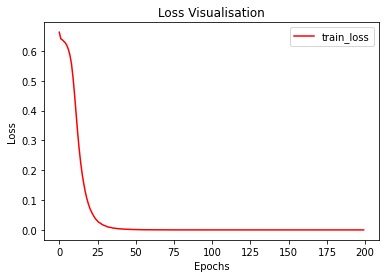

In [ ]:


from matplotlib import pyplot as plt
plt.plot(hist.history["loss"],color = 'red', label = 'train_loss')
#plt.plot(hist.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN1_Train_GERMEVAL2018_Test_HASOC2020_TASK_A_Ger_lossPlot.pdf',dpi=1000)

from google.colab import files
files.download('CNN1_Train_GERMEVAL2018_Test_HASOC2020_TASK_A_Ger_lossPlot.pdf') 



# Epoch v/s Accuracy Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

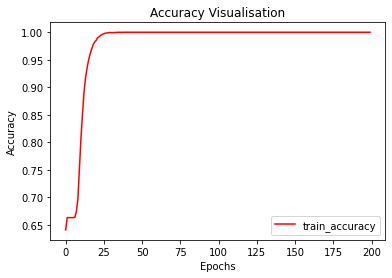

In [ ]:


plt.plot(hist.history["accuracy"],color = 'red', label = 'train_accuracy')
#plt.plot(hist.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN1_Train_GERMEVAL2018_Test_HASOC2020_TASK_A_Ger_accuracyPlot.pdf',dpi=1000)
files.download('CNN1_Train_GERMEVAL2018_Test_HASOC2020_TASK_A_Ger_accuracyPlot.pdf') 



# Area under Curve-ROC


In [ ]:


pred_train = CNN1_network.predict(padded_clean_text_stem)
pred_test = CNN1_network.predict(padded_clean_text_t_stem)



In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig('CNN1_Train_GERMEVAL2018_Test_HASOC2020_TASK_A_Ger_Area_RocPlot.pdf',dpi=1000)
    files.download('CNN1_Train_GERMEVAL2018_Test_HASOC2020_TASK_A_Ger_Area_RocPlot.pdf')

  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

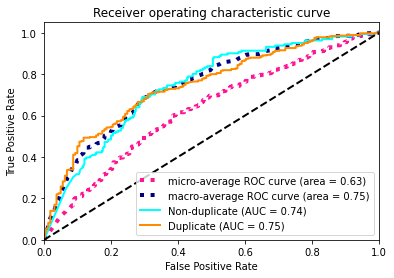

In [ ]:
plot_AUC_ROC(label_twoDimension_t,pred_test)